# 1.3.0 Target Analysis

### Methodology
This section of the analysis focuses on examining the target variable, which identifies whether a loan is bad (i.e., the customer was 34 days late or more in 77 days of contract). Understanding patterns in the bad rate is crucial for assessing risk and calibrating the model accordingly.
1. Overall Bad Rate: Calculate the overall default rate by dividing the sum of defaulted loans by the total number of loans.
    Results: Based on the data provided:
    Total Loans: 14,454
    Total Defaults: 2,700
    Overall Default Rate: 18.68%

2. Bad Rate Analysis by Loan Origination Month: To determine how the bad rate varies by the month the loan was originated.
- Data Segmentation: Group the dataset by the loan_origination_datetime_month to analyze loans based on the month they were disbursed.
- Rate Calculation: For each group, calculate the total number of loans (LOANS), the number of bad loans (BAD_LOANS), and the bad rate (BAD_RATE as the ratio of BAD_LOANS to LOANS).

3. Bad Rate Analysis by Credit Experience: This study analyzes the default rates among different segments of customers based on their credit experience (customers with no credit history, with less credit experience, and with high credit experience).
- Customer Segmentation: Classify customers into categories based on their credit experience. The criteria for segmentation (e.g., number of prior loans, credit age) should be clearly defined.
- Rate Calculation: Calculate the default rate for each category to identify which segment poses higher risks.


### Conclusions
- Insights from Loan Origination Month Analysis
    - Trends Observed:
        - The bad rate tends to increase as the year progresses, peaking in early 2023 before showing a variable trend.
        - Notable peaks are observed in October 2022, December 2022, and January 2023, suggesting potential seasonality or economic factors impacting default rates (e.g. Buen Fin, Christmas).

- Insights from Credit Experience Analysis
    - It is hypothesized that customers with no or limited credit history might exhibit higher default rates due to unproven creditworthiness. Conversely, those with extensive credit history might show lower default rates if they have a history of good credit management.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Load Data

In [2]:
DATA_PATH = Path.cwd().parent / "data"
FINAL_DATASET_PATH = DATA_PATH / f"processed/202405_final_dataset.pickle"

df = pd.read_pickle(FINAL_DATASET_PATH)

### 2. Analysis Bad Rate by loan_origination_datetime_month

In [3]:
_df = df.agg({"target": ["count", "sum", "mean"]})
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,index,target
0,count,14454.0000
1,sum,2700.0000
2,mean,0.1868


### 3. Analysis Bad Rate by loan_origination_datetime_month

In [4]:
_df = df.groupby("loan_origination_datetime_month").agg({"target": ["count", "sum", "mean"]})
_df.columns = ["_".join(i) for i in _df.columns.values]
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,loan_origination_datetime_month,LOANS,BAD_LOANS,BAD_RATE
0,2022-07,826,116,0.140436
1,2022-08,1060,184,0.173585
2,2022-09,874,161,0.184211
3,2022-10,964,203,0.210581
4,2022-11,1218,210,0.172414
5,2022-12,1624,350,0.215517
6,2023-01,1961,457,0.233044
7,2023-02,2005,368,0.183541
8,2023-03,2026,368,0.181639
9,2023-04,1819,282,0.155030


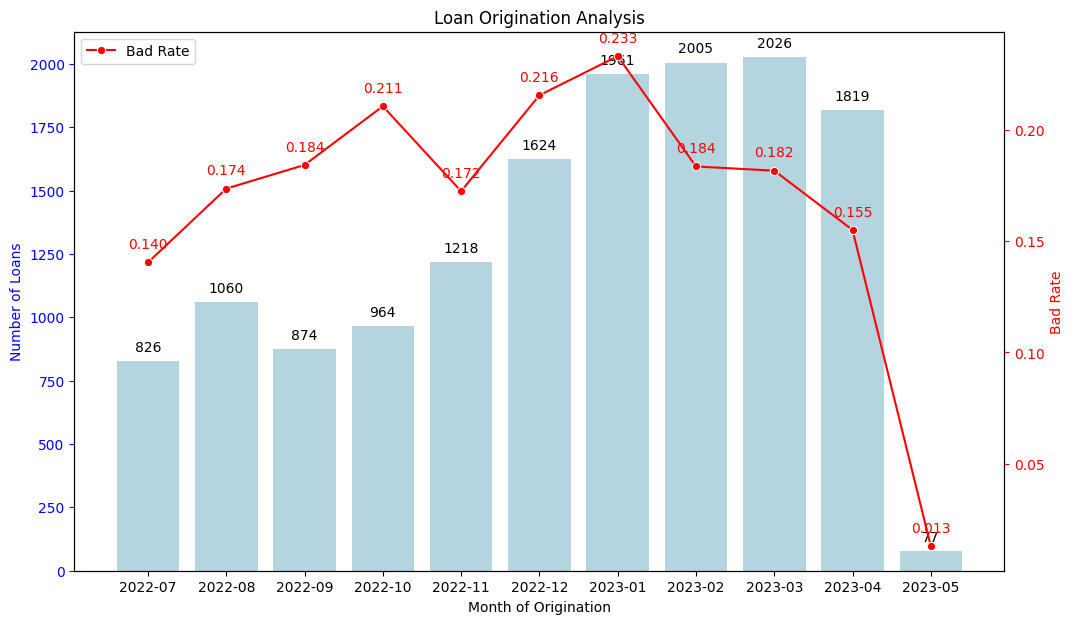

In [5]:
plt.figure(figsize=(12, 7))

ax1 = sns.barplot(x="loan_origination_datetime_month", y="LOANS", data=_df, color="lightblue", label="Total Loans")
ax1.set_xlabel('Month of Origination')
ax1.set_ylabel('Number of Loans', color='b')
ax1.tick_params(axis='y', colors='blue')

for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{_df["LOANS"][i]}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10), textcoords='offset points')

ax2 = ax1.twinx()
line_plot = sns.lineplot(x="loan_origination_datetime_month", y="BAD_RATE", data=_df, marker='o', color="red", ax=ax2, label="Bad Rate")
ax2.set_ylabel('Bad Rate', color='r')
ax2.tick_params(axis='y', colors='red')

for i, point in enumerate(_df["BAD_RATE"]):
    ax2.annotate(f'{point:.3f}', (i, point), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.title('Loan Origination Analysis')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

### 4. Analysis Bad Rate by loan_origination_datetime_month

In [6]:
df["credit_reports__loans_count"].describe()

count    14454.000000
mean        19.874568
std         28.894133
min          0.000000
25%          0.000000
50%          9.000000
75%         28.000000
max        269.000000
Name: credit_reports__loans_count, dtype: float64

In [7]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0,5), (5, 10), (10, 15), (15, 20), (20, 30), (30, 40), (40, 60), (60, 300)])
df["credit_reports__loans_count_range"] = pd.cut(df["credit_reports__loans_count"], bins = bins, right = False, include_lowest=True)
_df = df.groupby(["credit_reports__loans_count_range"]).agg({"target": ["count", "sum", "mean"]})
_df.columns = ["_".join(i) for i in _df.columns.values]
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,credit_reports__loans_count_range,LOANS,BAD_LOANS,BAD_RATE
0,"(-1, 0]",5282,982,0.185914
1,"(0, 5]",983,183,0.186165
2,"(5, 10]",1292,260,0.201238
3,"(10, 15]",1100,233,0.211818
4,"(15, 20]",1000,205,0.205000
5,"(20, 30]",1433,288,0.200977
6,"(30, 40]",1015,177,0.174384
7,"(40, 60]",1162,205,0.176420
8,"(60, 300]",1187,167,0.140691


In [8]:
df_aux = df[df["credit_reports__loans_count"]>0]
df_aux["credit_reports__loans_count_range"] = pd.qcut(df_aux["credit_reports__loans_count"], 5)
_df = df_aux.groupby(["credit_reports__loans_count_range"]).agg({"target": ["count", "sum", "mean"]})
_df.columns = ["_".join(i) for i in _df.columns.values]
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,credit_reports__loans_count_range,LOANS,BAD_LOANS,BAD_RATE
0,"(0.999, 9.0]",2017,386,0.191373
1,"(9.0, 17.0]",1815,387,0.213223
2,"(17.0, 28.0]",1753,345,0.196805
3,"(28.0, 47.0]",1754,327,0.186431
4,"(47.0, 269.0]",1833,273,0.148936


In [9]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0,5), (5, 10), (10, 15), (15, 30), (30, 300)])
df["credit_reports__loans_count_range"] = pd.cut(df["credit_reports__loans_count"], bins = bins, right = False, include_lowest=True)
_df = df.groupby(["credit_reports__loans_count_range"]).agg({"target": ["count", "sum", "mean"]})
_df.columns = ["_".join(i) for i in _df.columns.values]
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,credit_reports__loans_count_range,LOANS,BAD_LOANS,BAD_RATE
0,"(-1, 0]",5282,982,0.185914
1,"(0, 5]",983,183,0.186165
2,"(5, 10]",1292,260,0.201238
3,"(10, 15]",1100,233,0.211818
4,"(15, 30]",2433,493,0.202630
5,"(30, 300]",3364,549,0.163199


In [10]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0, 5), (5, 10), (10, 20), (20, 30), (30, 300)])
df["credit_reports__loans_count_range"] = pd.cut(df["credit_reports__loans_count"], bins = bins, right = False, include_lowest=True)
_df = df.groupby(["credit_reports__loans_count_range"]).agg({"target": ["count", "sum", "mean"]})
_df.columns = ["_".join(i) for i in _df.columns.values]
_df = _df.reset_index().rename(columns={"target_mean": "BAD_RATE", "target_sum": "BAD_LOANS", "target_count": "LOANS"})
_df

,credit_reports__loans_count_range,LOANS,BAD_LOANS,BAD_RATE
0,"(-1, 0]",5282,982,0.185914
1,"(0, 5]",983,183,0.186165
2,"(5, 10]",1292,260,0.201238
3,"(10, 20]",2100,438,0.208571
4,"(20, 30]",1433,288,0.200977
5,"(30, 300]",3364,549,0.163199
